In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans



In [2]:
region = pd.read_csv('https://raw.githubusercontent.com/Axelvel/DS50/main/Datasets/Datasets_Region_France_2016_2020.csv', encoding='latin-1')
region.head()

,ï»¿Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
0,Auvergne Rhone-Alpes,01/01/2016,00:00,8114,2226,2.96,10.56,6.76,31
1,Auvergne Rhone-Alpes,01/01/2016,00:30,8012,2227,2.96,10.56,6.76,31
2,Auvergne Rhone-Alpes,01/01/2016,01:00,7789,2205,2.96,10.56,6.76,32
3,Auvergne Rhone-Alpes,01/01/2016,01:30,7749,2212,2.96,10.56,6.76,32
4,Auvergne Rhone-Alpes,01/01/2016,02:00,7724,2209,2.96,10.56,6.76,32


In [3]:
colonne = [	'Electricite'	,'Gaz'	,'Tmin',	'Tmax',	'Tmoy',	'Taux de Co2']
x=region[colonne]
x=np.array(x)

In [4]:
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

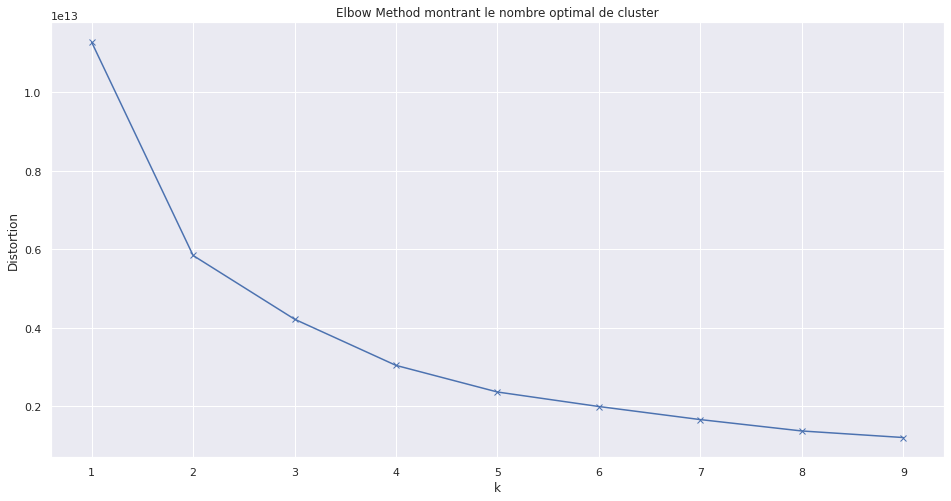

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method montrant le nombre optimal de cluster')
plt.show()

In [6]:
kmeans_model = KMeans (n_clusters=3)

In [11]:
kmeans_predict = kmeans_model.fit_predict(x)

In [8]:
region['Cluster']=kmeans_predict

Text(0, 0.5, 'Tmax')

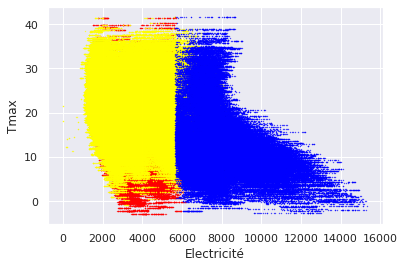

In [12]:
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 3], s = 0.1, c = 'red')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 3], s = 0.1, c = 'yellow')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 3], s = 0.1, c = 'blue')
plt.xlabel('Electricité')
plt.ylabel('Tmax')

Text(0, 0.5, 'Taux de CO2')

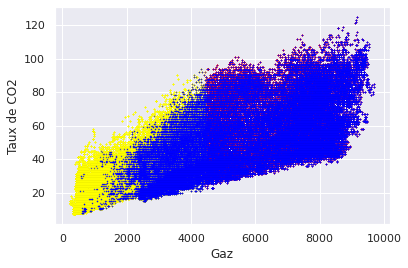

In [13]:
plt.scatter(x[kmeans_predict == 0, 1], x[kmeans_predict == 0, 5], s = 0.1, c = 'red')
plt.scatter(x[kmeans_predict == 1, 1], x[kmeans_predict == 1, 5], s = 0.1, c = 'yellow')
plt.scatter(x[kmeans_predict == 2, 1], x[kmeans_predict == 2, 5], s = 0.1, c = 'blue')
plt.xlabel('Gaz')
plt.ylabel('Taux de CO2')